# DATASET DESCRIPTION 📖

Movies Dataset consist of 24 columns and 45466 rows but we worked with 17 column only and we end up working with 31K rows, then we worked with more than 20K rows with genres (Drama, Action, Comedy, Horror), At the end we worked with Arabic movies only for our interest but it's a pretty small subset but it was so exciting to us. We are implementing a movie recommendation system.


## IMPORT LIBRARIES 📚

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# model selecting
from sklearn.model_selection import train_test_split , StratifiedKFold
# preprocessing
# from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

## IMPORT DATASET 📁

In [61]:
Metadata=pd.read_csv(r"C:\Users\Admin\Downloads\archive\movies_metadata.csv", low_memory=False)
ratings_df = pd.read_csv(r"C:\Users\Admin\Downloads\archive\ratings_small.csv", low_memory=False)
Metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


## Data Exploration ✨

In [62]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [63]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [64]:
Metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

The ratings dataframe contains information of userId, the movieId of the movie watched by that user, the rating given by the user and timestamp.

The movies dataframe contains the information of the movies like movieId, title, genre and so on.

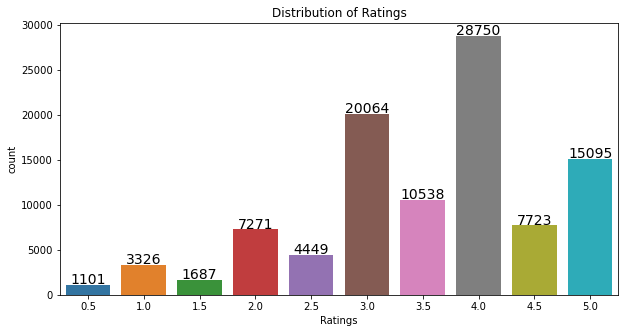

In [65]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=ratings_df, x='rating')
labels = (ratings_df['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

The ratings distribution shows that there are relatively fewer movies that are lower rated. This can be because most of the users who didn't like the movie, didn't care enough to rate the movie. 

In [66]:
#Keep the 1st genre only, it's the most indicator the movie genre
Metadata['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [67]:
Metadata['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [68]:
Metadata['spoken_languages']

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [69]:
Metadata['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [70]:
Metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [71]:
# adult Values isn't useful at all, I think I will drop all values that is not (False, True)
print(Metadata['adult'].unique())

['False' 'True' ' - Written by Ørnås'
 ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'
 ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']


In [72]:
#Status values, ==> 6 values
Metadata.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [73]:
#Will drop nan valeus
Metadata.video.unique()

array([False, True, nan], dtype=object)

In [74]:
# needs to be changed to integer.
Metadata.popularity.describe()

count     45461
unique    43758
top         0.0
freq         66
Name: popularity, dtype: object

In [75]:
#Extract companies names
Metadata.production_companies.unique()

array(["[{'name': 'Pixar Animation Studios', 'id': 3}]",
       "[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]",
       "[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]",
       ...,
       "[{'name': 'Westdeutscher Rundfunk (WDR)', 'id': 7025}, {'name': 'Working Title Films', 'id': 10163}, {'name': '20th Century Fox Television', 'id': 16323}, {'name': 'CanWest Global Communications', 'id': 38978}]",
       "[{'name': 'Sine Olivia', 'id': 19653}]",
       "[{'name': 'Yermoliev', 'id': 88753}]"], dtype=object)

In [76]:
#Will Extract countries names
Metadata.production_countries.unique()

array(["[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       ...,
       "[{'iso_3166_1': 'PL', 'name': 'Poland'}, {'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_1': 'SK', 'name': 'Slovakia'}]",
       "[{'iso_3166_1': 'CU', 'name': 'Cuba'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'ES', 'name': 'Spain'}]",
       "[{'iso_3166_1': 'EG', 'name': 'Egypt'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"],
      dtype=object)

In [77]:
print(Metadata[['id','imdb_id','title','original_title','original_language','spoken_languages']].nunique())

id                   45436
imdb_id              45417
title                42277
original_title       43373
original_language       92
spoken_languages      1931
dtype: int64


In [78]:
# Droping useless columns -> 7 cols 
Metadata=Metadata.drop(['belongs_to_collection','homepage','title','imdb_id','tagline','poster_path'],axis=1)
print(Metadata.shape)
Metadata.head()

(45466, 18)


,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,5.7,173.0


In [79]:
Metadata=Metadata.dropna()
Metadata.shape

(44361, 18)

## Data Cleaning 🧹

1-Extract production_countries name (only 1st name of the countries)

2-Extract production_companies name (only 1st name of the companies)

3-Extract spoken_languages name (only 1st name of the languages as it's the most important)

4-Extract genres name (only 1st name of the genres as it's the best indicator of the movie genre)

In [80]:
# production_countries
# Get production_countries names
Metadata["production_countries"]=Metadata.loc[Metadata['production_countries'].notna(), 'production_countries'].str.split("'name': ").str[1].str.split("'").str[1]

# production_companies
Metadata['production_companies']=Metadata.loc[Metadata['production_companies'].notna(), 'production_companies'].str.split("'name': ").str[1].str.split("'").str[1]

#spoken_languages
Metadata['spoken_languages']=Metadata.loc[Metadata['spoken_languages'].notna(), 'spoken_languages'].str.split("'name': ").str[1].str.split("'").str[1]

#genres
Metadata['genres']=Metadata.loc[Metadata['genres'].notna(), 'genres'].str.split("'name': ").str[1].str.split("'").str[1]

Metadata.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000,Animation,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,False,7.7,5415.0
1,False,65000000,Adventure,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,False,6.9,2413.0
2,False,0,Romance,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,False,6.5,92.0
3,False,16000000,Comedy,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,False,6.1,34.0
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,False,5.7,173.0


In [81]:
# release_date
# Transfer release_date from object to datetime
Metadata['release_date']=pd.to_datetime(Metadata['release_date'])
Metadata.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,30000000,Animation,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,False,7.7,5415.0
1,False,65000000,Adventure,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,False,6.9,2413.0
2,False,0,Romance,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,False,6.5,92.0
3,False,16000000,Comedy,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,False,6.1,34.0
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,False,5.7,173.0


In [82]:
#1id (object -> int)
#popularity (object -> float)
#budget (object -> float)
# I think it's not necessary to tranfer id from object to int.
Metadata['id']=Metadata['id'].astype(str).astype(int)
Metadata[['popularity','budget']]=Metadata[['popularity','budget']].astype(str).astype(float)
Metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44361 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 44361 non-null  object        
 1   budget                44361 non-null  float64       
 2   genres                42246 non-null  object        
 3   id                    44361 non-null  int32         
 4   original_language     44361 non-null  object        
 5   original_title        44361 non-null  object        
 6   overview              44361 non-null  object        
 7   popularity            44361 non-null  float64       
 8   production_companies  33178 non-null  object        
 9   production_countries  38470 non-null  object        
 10  release_date          44361 non-null  datetime64[ns]
 11  revenue               44361 non-null  float64       
 12  runtime               44361 non-null  float64       
 13  spoken_languages

In [83]:
#Droping duplicates in id columns
Metadata=Metadata.drop_duplicates('id')

In [84]:
#Seems like spoken_languages column is a lil bit messy
# It has noisy data and un-understandable data
print(Metadata.spoken_languages.nunique())
Metadata.spoken_languages.unique()

73


array(['English', 'Français', '广州话 / 廣州話', '普通话', 'Pусский', 'Español',
       nan, 'shqip', 'Italiano', 'Deutsch', 'فارسی', 'Nederlands',
       'Dansk', 'العربية', 'Magyar', '', 'Český', 'svenska', '日本語',
       'Português', 'Català', '한국어/조선말', 'Afrikaans', 'বাংলা', 'Latin',
       'Cymraeg', 'Tiếng Việt', 'Polski', 'ελληνικά', 'Norsk', 'Bosanski',
       'Gaeilge', 'Bokmål', 'Український', 'No Language', 'עִבְרִית',
       'Kiswahili', 'Srpski', 'हिन्दी', 'Azərbaycan', 'ภาษาไทย',
       'Bamanankan', 'suomi', 'Română', 'Hrvatski', 'Türkçe', 'ქართული',
       'Slovenčina', 'беларуская мова', 'български език', 'Esperanto',
       'Galego', 'Íslenska', 'isiZulu', 'Eesti', 'Latviešu', 'қазақ',
       'Slovenščina', 'Bahasa indonesia', 'Wolof', 'اردو', 'Kinyarwanda',
       'euskera', 'Bahasa melayu', 'தமிழ்', 'తెలుగు', 'Lietuvi\\x9akai',
       '?????', '??????', 'پښتو', 'ਪੰਜਾਬੀ', 'Somali', 'Hausa', 'Fulfulde'],
      dtype=object)

In [85]:
# I GUESS I will work with original_language column.
print(Metadata.original_language.nunique())
Metadata.original_language.unique()
# Droping nan after cleaning
Metadata=Metadata.dropna()

89


In [86]:
Metadata.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.095260,0.435170,0.766621,0.159216,0.066730,0.671079
id,-0.095260,1.000000,-0.050201,-0.066299,-0.091297,-0.125778,-0.053502
popularity,0.435170,-0.050201,1.000000,0.500692,0.125126,0.144727,0.551961
revenue,0.766621,-0.066299,0.500692,1.000000,0.124802,0.092141,0.809587
runtime,0.159216,-0.091297,0.125126,0.124802,1.000000,0.155480,0.133371
vote_average,0.066730,-0.125778,0.144727,0.092141,0.155480,1.000000,0.141011
vote_count,0.671079,-0.053502,0.551961,0.809587,0.133371,0.141011,1.000000


<AxesSubplot:>

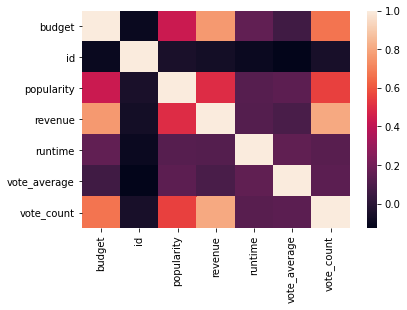

In [87]:
sns.heatmap(Metadata.corr())

In [88]:
Metadata['vote_count'].describe()

count    31740.000000
mean       153.720195
std        582.416182
min          0.000000
25%          5.000000
50%         16.000000
75%         60.000000
max      14075.000000
Name: vote_count, dtype: float64

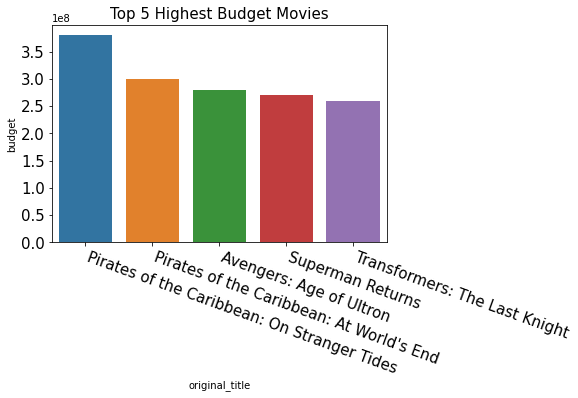

In [89]:
cols = ['original_title', 'budget']
budget_Metadata = Metadata.sort_values('budget', ascending=False)[cols].set_index('original_title')
top_5 = budget_Metadata.head(5)
sns.barplot(data=top_5, x=top_5.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Budget Movies', fontsize=15);

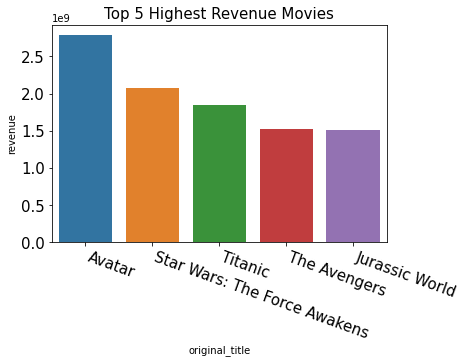

In [90]:
cols = ['original_title', 'revenue']
revenue_Metadata = Metadata.sort_values('revenue', ascending=False)[cols].set_index('original_title')
top_5 = revenue_Metadata.head(5)
sns.barplot(data=top_5, x=top_5.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Revenue Movies', fontsize=15);

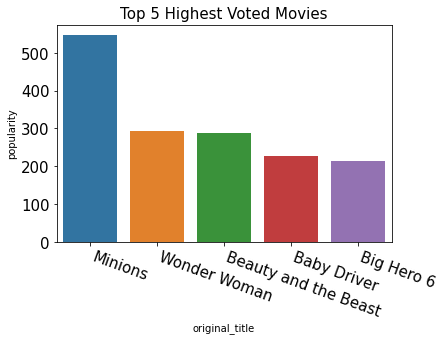

In [91]:
cols = ['original_title', 'popularity']
popularity_Metadata = Metadata.sort_values('popularity', ascending=False)[cols].set_index('original_title')
top_5 = popularity_Metadata.head(5)
sns.barplot(data=top_5, x=top_5.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Voted Movies', fontsize=15);

In [92]:
import plotly.express as px
def top_10(data, column):
    temp_data = data.apply(lambda x: pd.Series(x[column], dtype='object'),axis=1).stack().reset_index(level=1, drop=True)
    a = temp_data.value_counts().reset_index()
    a.rename(columns={0: 'Value'})
    fig = px.bar(a.iloc[:10][::-1], x=0, y='index', orientation='h', title="Top 10 {}".format(column),color_discrete_sequence=['#707B7C '])
    fig.show()   

In [93]:
fig = px.scatter(Metadata, x="budget", y="revenue", trendline="ols", title="Relationship between Budget and Revenue")
fig.update_layout(xaxis_title="Budget", 
                 yaxis_title="Revenue")
fig.show()

## ML Prep 🦾

In [94]:
vote_counts = Metadata[Metadata['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = Metadata[Metadata['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.447195967233775

In [95]:
m = vote_counts.quantile(0.95)
m

684.0

In [96]:
Metadata['year'] = pd.to_datetime(Metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [97]:
qualified = Metadata[(Metadata['vote_count'] >= m) & (Metadata['vote_count'].notnull()) & (Metadata['vote_average'].notnull())][[ 'original_title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(1588, 6)

In [98]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [99]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [100]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

In [101]:
qualified.head(15)

,original_title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,Action,7.881691
12481,The Dark Knight,2008,12269,8,123.167259,Drama,7.865196
22879,Interstellar,2014,11187,8,32.213481,Adventure,7.852909
2843,Fight Club,1999,9678,8,63.869599,Drama,7.831488
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,Adventure,7.817657
292,Pulp Fiction,1994,8670,8,140.950236,Thriller,7.813329
314,The Shawshank Redemption,1994,8358,8,51.645403,Drama,7.806888
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,Adventure,7.804027
351,Forrest Gump,1994,8147,8,48.307194,Comedy,7.802274
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,Adventure,7.790256


We see that three Christopher Nolan Films, Inception, The Dark Knight and Interstellar occur at the very top of our chart. The chart also indicates a strong bias of TMDB Users towards particular genres and directors.

Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the 85th percentile instead of 95.

In [102]:
s = Metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_Metadata = Metadata.drop('genres', axis=1).join(s)

In [103]:
def build_chart(genre, percentile=0.85):
    df = gen_Metadata[gen_Metadata['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['original_title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

Let us see our method in action by displaying the Top 15 Romance and Action Movies (Romance almost didn't feature at all in our Generic Top Chart despite being one of the most popular movie genres).

In [104]:
build_chart('Romance').head(15)

,original_title,year,vote_count,vote_average,popularity,wr
40251,君の名は。,2016,1030,8,34.461252,7.817082
37863,Sing Street,2016,669,8,10.672862,7.728446
22168,Her,2013,4215,7,13.829515,6.970565
23512,The Fault in Our Stars,2014,3868,7,16.274653,6.967975
7834,The Notebook,2004,3163,7,15.239013,6.961004
588,Beauty and the Beast,1991,3029,7,23.433511,6.959321
1220,Groundhog Day,1993,2358,7,12.989627,6.948107
10385,Corpse Bride,2005,1957,7,12.920032,6.937871
590,Pretty Woman,1990,1807,7,13.348451,6.932922
1331,Grease,1978,1633,7,7.854899,6.926093


In [105]:
build_chart('Action').head(15)

,original_title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.944294
4135,Scarface,1983,3017,8,11.299673,7.758269
1910,七人の侍,1954,892,8,15.017770,7.325297
43190,Band of Brothers,2001,725,8,7.903731,7.214766
14551,Avatar,2009,12114,7,185.070892,6.959216
26564,Deadpool,2016,11444,7,187.860492,6.956888
23753,Guardians of the Galaxy,2014,10014,7,53.291601,6.950907
26553,Mad Max: Fury Road,2015,9629,7,29.361780,6.949003
18252,The Dark Knight Rises,2012,9263,7,20.582580,6.947050
2458,The Matrix,1999,9079,7,33.366332,6.946010


You can see that in the movies dataframe, there are few records with Nan title. This doesn't serve your purpose as you cannot recommend movies without title. You can remove these records

## Building a Recommender 🪄

In [106]:
Metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

Our model will not understand the language that we are getting as op in the above cell.So,we use TF-IDF to vectorize the objects. This is also called as NLP(natural language processor)

In [107]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf=TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
Metadata['overview']=Metadata['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data 
tfidf_matrix=tfidf.fit_transform(Metadata['overview'])

tfidf_matrix.shape

(31740, 60640)

we are importing linear kernel to check how two vectors of overview are related.It gives value b/w 0-1 .if the value is 0.6 ,that means overview 1 and 2 are having that much similarity

In [108]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [109]:
cosine_sim[0] 

array([1.        , 0.01544736, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [113]:
indices = pd.Series(Metadata.index, index=Metadata['original_title']).drop_duplicates()
#reverse mapping of indices and movie titles

In [114]:
indices

original_title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
The Burkittsville 7            45458
Caged Heat 3000                45459
Robin Hood                     45460
Siglo ng Pagluluwal            45462
Betrayal                       45463
Length: 31740, dtype: int64

We are writing a function that gives recommedations based on movie title that we give. idx returns the index of movie and later sigmoid them ad sort them in order. therefore we are getting the top 10 recommedations for a given movie

In [117]:
def content_based(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return Metadata['original_title'].iloc[movie_indices]

In [118]:
content_based('Black Swan')

34645         Rock the Casbah
32995          Tristesse Club
35280         Botte di Natale
1995                      Tex
16546           Good Time Max
36000       Un dollaro bucato
2109     Juno and the Paycock
29563     Two on a Guillotine
17689              Dead Awake
10688                 친절한 금자씨
Name: original_title, dtype: object

In [119]:
content_based('Avatar')

40907        Lista de espera
5356             The Big Bus
21433               Evidence
19895    Compartiment tueurs
34003                   Howl
1024          Get on the Bus
37431             Polustanok
7360              Just Write
15927      The Lady Vanishes
13549          Union Station
Name: original_title, dtype: object